In [1]:
""" 
PROGRAM: Fundus_Classifer_Training.ipynb
AUTHOR: Teah Serani, Christina Kang and George Saab 
DATE: 12April21
FUNCTION: Loads images, Creates Testing and Validation Dataset, Trains and Saves Model 
INPUT: Directories 
OUTPUT: Validation Accuracy, Confusion Matrix and ROC Curve 

NOTES: George Washington University, Biomedical Engineering Senior Capstone Design (AEye)
Algorithm was created in AWS Sagemaker (notebook instance ml.c4.8xlarge and kernal conda_tensorflow2_p36)
"""

' \nPROGRAM: Fundus_Classifer_Training.ipynb\nAUTHOR: Teah Serani, Christina Kang and George Saab \nDATE: 12April21\nFUNCTION: Loads images, Creates Testing and Validation Dataset, Trains and Saves Model \nINPUT: Directories \nOUTPUT: Validation Accuracy, Confusion Matrix and ROC Curve \n\nNOTES: George Washington University, Biomedical Engineering Senior Capstone Design (AEye)\nAlgorithm was created in AWS Sagemaker (notebook instance ml.c4.8xlarge and kernal conda_tensorflow2_p36)\n'

In [2]:
import numpy as np 
import pandas as pd 
import cv2
import random
import matplotlib.pyplot as plt

import sagemaker                                            #library not need to run locally 
from sagemaker import get_execution_role                    # library not need to run locally
from sagemaker.tensorflow import TensorFlow                 #to run locally: from tensorflow import Tensorflow 
from keras.preprocessing.image import ImageDataGenerator 
import os


from IPython.display import Image
from IPython.display import display
from PIL import Image




Using TensorFlow backend.


In [3]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

image_size=299 
labels = []
dataset = []


In [4]:
"""
Function to load data into database. Inputs the disease path and label.
Images are resized. the dataset then is shuffled 
"""
def create_dataset(d_dir, label):
    for image_path in os.listdir(d_dir):
        image_path = os.path.join(d_dir, image_path)
        print (image_path)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR) 
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [5]:
class_names=("Normal","Diabetes","Cataracts","Glaucoma","AMD","Myopia")

In [6]:
normal_dir= 'Normal/'                 #PATH
dataset= create_dataset(normal_dir,0)
len(dataset)

Normal/610_left.jpg
Normal/333_left.jpg
Normal/56_left.jpg
Normal/628_right.jpg
Normal/685_right.jpg
Normal/602_right.jpg
Normal/805_right.jpg
Normal/476_left.jpg
Normal/310_left.jpg
Normal/810_left.jpg
Normal/125_right.jpg
Normal/770_left.jpg
Normal/1_left.jpg
Normal/132_left.jpg
Normal/509_left.jpg
Normal/785_left.jpg
Normal/875_right.jpg
Normal/349_left.jpg
Normal/696_right.jpg
Normal/879_right.jpg
Normal/208_right.jpg
Normal/552_right.jpg
Normal/295_left.jpg
Normal/172_right.jpg
Normal/695_right.jpg
Normal/648_right.jpg
Normal/693_right.jpg
Normal/511_left.jpg
Normal/25_left.jpg
Normal/326_left.jpg
Normal/197_left.jpg
Normal/384_left.jpg
Normal/530_left.jpg
Normal/470_right.jpg
Normal/74_right.jpg
Normal/271_right.jpg
Normal/174_right.jpg
Normal/613_right.jpg
Normal/27_left.jpg
Normal/279_right.jpg
Normal/237_left.jpg
Normal/155_left.jpg
Normal/704_right.jpg
Normal/501_right.jpg
Normal/798_right.jpg
Normal/766_left.jpg
Normal/110_right.jpg
Normal/219_right.jpg
Normal/54_left.jpg
No

354

In [7]:
diabetes_dir='Diabetes/'                #PATH
dataset= create_dataset(diabetes_dir,1)
len(dataset)

Diabetes/2220_left.jpg
Diabetes/578_right.jpg
Diabetes/601_right.jpg
Diabetes/757_left.jpg
Diabetes/868_right.jpg
Diabetes/411_left.jpg
Diabetes/722_left.jpg
Diabetes/666_right.jpg
Diabetes/597_left.jpg
Diabetes/1285_right.jpg
Diabetes/492_left.jpg
Diabetes/383_left.jpg
Diabetes/492_right.jpg
Diabetes/836_left.jpg
Diabetes/619_right.jpg
Diabetes/688_left.jpg
Diabetes/535_right.jpg
Diabetes/898_right.jpg
Diabetes/485_right.jpg
Diabetes/556_left.jpg
Diabetes/428_right.jpg
Diabetes/223_left.jpg
Diabetes/562_left.jpg
Diabetes/537_right.jpg
Diabetes/871_left.jpg
Diabetes/229_right.jpg
Diabetes/786_left.jpg
Diabetes/469_left.jpg
Diabetes/67_left.jpg
Diabetes/672_right.jpg
Diabetes/274_right.jpg
Diabetes/978_right.jpg
Diabetes/697_right.jpg
Diabetes/234_right.jpg
Diabetes/607_left.jpg
Diabetes/600_left.jpg
Diabetes/229_left.jpg
Diabetes/569_left.jpg
Diabetes/684_right.jpg
Diabetes/1409_left.jpg
Diabetes/64_left.jpg
Diabetes/784_right.jpg
Diabetes/865_right.jpg
Diabetes/1657_right.jpg
Diabetes

708

In [8]:
cataracts_dir='Cataracts/'               #PATH
dataset= create_dataset(cataracts_dir,2)
len(dataset)

Cataracts/2195_left.jpg
Cataracts/2122_right.jpg
Cataracts/2137_left.jpg
Cataracts/cataract_024.jpg
Cataracts/cataract_056.jpg
Cataracts/2170_right.jpg
Cataracts/560_left.jpg
Cataracts/2141_right.jpg
Cataracts/2118_right.jpg
Cataracts/2167_right.jpg
Cataracts/cataract_007.jpg
Cataracts/cataract_087.jpg
Cataracts/2217_right.jpg
Cataracts/1484_left.jpg
Cataracts/2127_left.jpg
Cataracts/820_left.jpg
Cataracts/cataract_041.jpg
Cataracts/2157_left.jpg
Cataracts/2158_left.jpg
Cataracts/611_left.jpg
Cataracts/cataract_080.jpg
Cataracts/cataract_070.jpg
Cataracts/2194_left.jpg
Cataracts/cataract_083.jpg
Cataracts/2122_left.jpg
Cataracts/2155_left.jpg
Cataracts/2147_left.jpg
Cataracts/2120_left.jpg
Cataracts/2213_right.jpg
Cataracts/2236_left.jpg
Cataracts/2232_right.jpg
Cataracts/907_left.jpg
Cataracts/cataract_100.jpg
Cataracts/2169_right.jpg
Cataracts/cataract_022.jpg
Cataracts/cataract_030.jpg
Cataracts/2130_right.jpg
Cataracts/2209_right.jpg
Cataracts/cataract_004.jpg
Cataracts/cataract_07

1062

In [9]:
glaucoma_dir='Glaucoma/'                #PATH
dataset= create_dataset(glaucoma_dir,3)
len(dataset)

Glaucoma/Glaucoma_004.jpg
Glaucoma/1353_left.jpg
Glaucoma/Glaucoma_070.jpg
Glaucoma/Glaucoma_029.jpg
Glaucoma/1465_right.jpg
Glaucoma/583_left.jpg
Glaucoma/V0181.jpg
Glaucoma/g0010.jpg
Glaucoma/V0006.jpg
Glaucoma/g0028.jpg
Glaucoma/V0270.jpg
Glaucoma/1345_left.jpg
Glaucoma/1210_right.jpg
Glaucoma/1325_right.jpg
Glaucoma/Glaucoma_100.jpg
Glaucoma/Glaucoma_035.jpg
Glaucoma/5.jpg
Glaucoma/1306_left.jpg
Glaucoma/1469_right.jpg
Glaucoma/1424_left.jpg
Glaucoma/Glaucoma_072.jpg
Glaucoma/g0040.jpg
Glaucoma/1977_left.jpg
Glaucoma/Glaucoma_038.jpg
Glaucoma/1411_left.jpg
Glaucoma/1227_left.jpg
Glaucoma/Glaucoma_099.jpg
Glaucoma/1216_left.jpg
Glaucoma/Glaucoma_007.jpg
Glaucoma/Glaucoma_052.jpg
Glaucoma/Glaucoma_075.jpg
Glaucoma/g0020.jpg
Glaucoma/1975_left.jpg
Glaucoma/1977_right.jpg
Glaucoma/V0149.jpg
Glaucoma/1497_left.jpg
Glaucoma/10.jpg
Glaucoma/Glaucoma_084.jpg
Glaucoma/1217_left.jpg
Glaucoma/Glaucoma_027.jpg
Glaucoma/1222_right.jpg
Glaucoma/g0004.jpg
Glaucoma/13_g.jpg
Glaucoma/1362_right.jpg

1416

In [10]:
amd_dir='Age/'                     #PATH
dataset= create_dataset(amd_dir,4)
len(dataset)

Age/A0047.jpg
Age/1ffa9535-8d87-11e8-9daf-6045cb817f5b..JPG
Age/A0055.jpg
Age/1ffa9540-8d87-11e8-9daf-6045cb817f5b..JPG
Age/977_left.jpg
Age/34.jpg
Age/265_right.jpg
Age/A0040.jpg
Age/235_left.jpg
Age/1ffa953d-8d87-11e8-9daf-6045cb817f5b..JPG
Age/1799_right.jpg
Age/1091_left.jpg
Age/1196_left.jpg
Age/A0017.jpg
Age/992_left.jpg
Age/1ffa952a-8d87-11e8-9daf-6045cb817f5b..JPG
Age/1197_right.jpg
Age/31.jpg
Age/961_right.jpg
Age/126_right.jpg
Age/681_left.jpg
Age/A0074.jpg
Age/1ffa9551-8d87-11e8-9daf-6045cb817f5b..JPG
Age/A0052.jpg
Age/1874_left.jpg
Age/603_left.jpg
Age/126_left.jpg
Age/A0011.jpg
Age/A0054.jpg
Age/927_right.jpg
Age/1295_left.jpg
Age/1877_left.jpg
Age/1ffa9553-8d87-11e8-9daf-6045cb817f5b..JPG
Age/1ffa9534-8d87-11e8-9daf-6045cb817f5b..JPG
Age/855_right.jpg
Age/1ffa952b-8d87-11e8-9daf-6045cb817f5b..JPG
Age/A0081.jpg
Age/A0021.jpg
Age/36.jpg
Age/359_right.jpg
Age/55_right.jpg
Age/A0073.jpg
Age/A0026.jpg
Age/53_right.jpg
Age/A0069.jpg
Age/1ffa9539-8d87-11e8-9daf-6045cb817f5b..JPG

1770

In [11]:
myopia_dir='Myopia/'                  #PATH
dataset= create_dataset(myopia_dir,5)
len(dataset)

Myopia/1606_right.jpg
Myopia/P0076.jpg
Myopia/1ffa94e1-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/1ffa9506-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/P0146.jpg
Myopia/1576_left.jpg
Myopia/1ffa94df-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/1ffa94fe-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/1618_left.jpg
Myopia/P0019.jpg
Myopia/P0187.jpg
Myopia/1ffa9503-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/1ffa94e4-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/P0115.jpg
Myopia/1ffa94d5-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/1605_right.jpg
Myopia/P0025.jpg
Myopia/1584_right.jpg
Myopia/1601_left.jpg
Myopia/1589_right.jpg
Myopia/1ffa94e7-8d87-11e8-9daf-6045cb817f5b..JPG
Myopia/1586_right.jpg
Myopia/1585_right.jpg
Myopia/P0036.jpg
Myopia/P0156.jpg
Myopia/P0147.jpg
Myopia/P0073.jpg
Myopia/1612_left.jpg
Myopia/P0106.jpg
Myopia/P0103.jpg
Myopia/P0017.jpg
Myopia/P0177.jpg
Myopia/P0034.jpg
Myopia/P0061.jpg
Myopia/P0026.jpg
Myopia/P0125.jpg
Myopia/P0095.jpg
Myopia/1581_right.jpg
Myopia/1591_left.jpg
Myopia/1ffa94ed-8d87-11e8-

2124

In [12]:
len(dataset)

2124

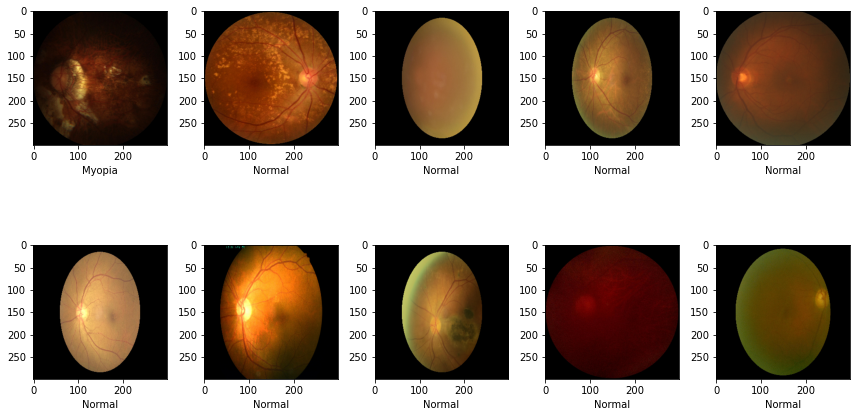

In [13]:
"""
Randomly displays 10 images with labels 
"""

plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 1:
        label = "Diabetes"
    if category== 2:
        label = 'Cataracts'
    if category== 3: 
        label = 'Glaucoma'
    if category==  4: 
        label = 'AMD'
    if category== 5:
        label = 'Myopia'
    else:
        label = "Normal"
    plt.subplot(2,5,i+1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 

In [14]:
#Creating X and Y
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [15]:
#Creating Test and Validation Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
np.save( 'x_test.npy',x_test)
np.save('y_test.npy', y_test)

In [16]:
#XCeption PreTrained Network 
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.xception import Xception

import tensorflow as tf 

image_size=299

input_tensor = Input(shape=(image_size, image_size, 3))
xception = Xception(weights="imagenet",include_top=False, input_tensor=input_tensor)


In [18]:
for layer in xception.layers: 
    layer.trainable = True 

In [19]:
#Building Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout, GlobalAveragePooling2D

model = Sequential(name='top_model')
model.add(GlobalAveragePooling2D(input_shape=xception.output_shape[1:]))
model.add(Dropout(0.25))  
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(170, activation='relu'))
model.add(Dropout(0.25)) 
model.add(Dense(6,activation='softmax')) 

model = tf.keras.models.Model(inputs=xception.input, outputs=model(xception.output))


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [21]:
#Parameters for optimizer
nadam = tf.keras.optimizers.Nadam(
    learning_rate=0.00008, beta_1=0.9, beta_2=0.999, epsilon=1e-07, 
    name='Nadam')

categorical=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer= nadam,loss= categorical,metrics=["accuracy"])

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("xception.h", monitor="val_acc",verbose=1,save_best_only=True,  
                             save_weights_only=False,period=1) 
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1) 

In [ ]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop]) 

Train on 1699 samples, validate on 425 samples
Epoch 1/15
1699/1699 [==============================] - 188s 110ms/sample - loss: 1.6918 - accuracy: 0.3643 - val_loss: 1.5899 - val_accuracy: 0.4729
Epoch 2/15
1699/1699 [==============================] - 169s 99ms/sample - loss: 1.4381 - accuracy: 0.6357 - val_loss: 1.4015 - val_accuracy: 0.6282
Epoch 3/15
1699/1699 [==============================] - 168s 99ms/sample - loss: 1.3030 - accuracy: 0.7604 - val_loss: 1.3758 - val_accuracy: 0.6541
Epoch 4/15
1699/1699 [==============================] - 169s 99ms/sample - loss: 1.2202 - accuracy: 0.8317 - val_loss: 1.3211 - val_accuracy: 0.7200
Epoch 5/15
1699/1699 [==============================] - 168s 99ms/sample - loss: 1.1710 - accuracy: 0.8840 - val_loss: 1.3325 - val_accuracy: 0.7153
Epoch 6/15
1699/1699 [==============================] - 168s 99ms/sample - loss: 1.1559 - accuracy: 0.8964 - val_loss: 1.3118 - val_accuracy: 0.7341
Epoch 7/15
1699/1699 [==============================] - 17

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)


425/425 [==============================] - 10s 24ms/sample - loss: 1.3040 - accuracy: 0.7412
loss: 1.3040243199292352
Accuracy: 0.7411765


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
x_test= x_test.astype(np.float32)   #not needed if running locally


y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
accuracy_score(y_test,y_pred)

0.7411764705882353

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.48      0.75      0.59        64
           1       0.66      0.49      0.56        71
           2       0.86      0.90      0.88        80
           3       0.88      0.68      0.77        68
           4       0.75      0.68      0.71        73
           5       0.93      0.93      0.93        69

    accuracy                           0.74       425
   macro avg       0.76      0.74      0.74       425
weighted avg       0.76      0.74      0.74       425



In [ ]:
%conda install mlxtend # not needed if running locally 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow2_p36

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiobotocore-1.2.2          |     pyhd8ed1ab_0          40 KB  conda-forge
    botocore-1.19.52           |     pyhd8ed1ab_0         4.4 MB  conda-forge
    pylint-2.6.0               |   py36h5fab9bb_1         452 KB  conda-forge
    ------------------------------------------------------------
                                           Tot

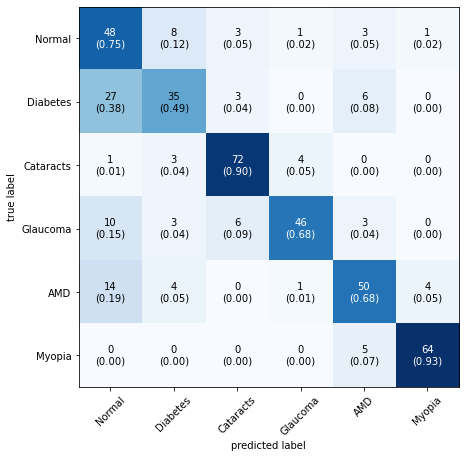

In [ ]:
#Confusion Matrix 

import mlxtend
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Diabetes","Cataracts","Glaucoma","AMD","Myopia"],
                      show_normed = True);

In [ ]:
model.save('algorithm5_6.h5')

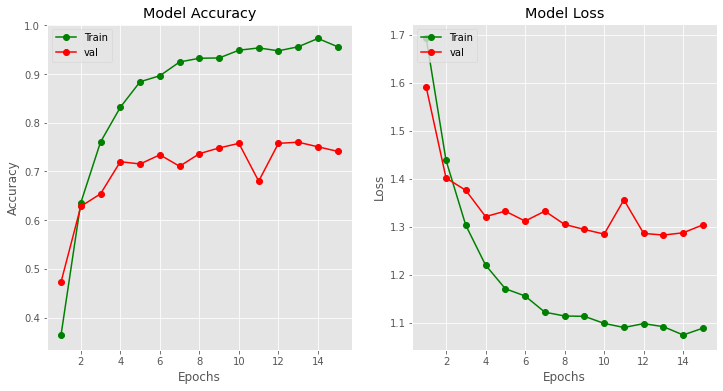

In [ ]:
#Accuracy and Loss Graphs 

plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-") 
plt.plot(epochs,history.history["val_accuracy"],"ro-") 
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

(425,)
425/425 [==============================] - 30s 70ms/sample


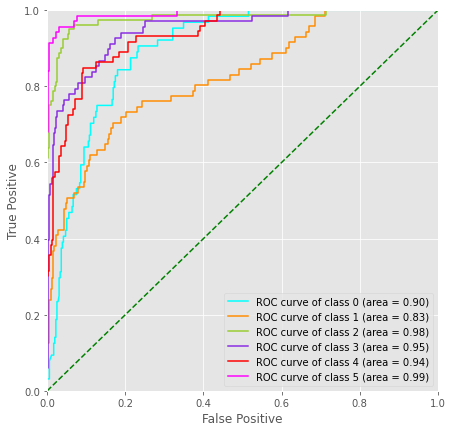

(425,)
(425, 299, 299, 3)
(425, 6)


In [39]:
#AUC/ROC

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.preprocessing.image import array_to_img, load_img
from itertools import cycle


n_classes = 6

print(y_test.shape)
y_test1 = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5]) 
for i in range (len(y_test)):
    img=array_to_img(x_test[i])
y_pred = model.predict(x_test, batch_size=1, verbose=1)


fp = dict()
tp = dict()
roc_auc = dict()

for i in range(n_classes):
    fp[i], tp[i], _ = roc_curve(y_test1[:, i], y_pred[:, i])
    roc_auc[i] = auc(fp[i], tp[i])

plt.figure(figsize=(7, 7))

colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'blueviolet', 'red', 'magenta']) 
for i, color in zip(range(n_classes), colors):
    plt.plot(fp[i], tp[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0,1],[0,1], color= 'green', linestyle='--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

plt.show()

print(y_test.shape)
print(x_test.shape)
print(y_pred.shape)


## 